    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 코스 컨텐츠에 들어온 횟수
	Viewing announcements : 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)

In [2475]:
# pip install xgboost

In [2476]:
# pip install kaggle

# 데이터셋 확인

In [2477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

file_name = glob('edu/academy_edu/*.csv')[0]

In [2478]:
df = pd.read_csv(file_name)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [2479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [2480]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [2481]:
df.describe(include=object)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [2482]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [2483]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [2484]:
df['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

In [2485]:
df['Class'].value_counts().sort_index()

H    142
L    127
M    211
Name: Class, dtype: int64

In [2486]:
# pip install category_encoders

In [2487]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2488]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [2489]:
features = df.columns[:-1].tolist()
label = 'Class'

In [2490]:
# # 스케일링 
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler

# df['raisedhands'] = preprocessing.scale(df['raisedhands'])
# df['VisITedResources'] = preprocessing.scale(df['VisITedResources'])
# df['AnnouncementsView'] = preprocessing.scale(df['AnnouncementsView'])
# df['Discussion'] = preprocessing.scale(df['Discussion'])

# df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].sample(10)

In [2491]:
# split df 
train = df.sample(frac=0.7)
# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]
print(train.shape)
print(test.shape)

(336, 17)
(144, 17)


## feature engineering 

In [2492]:
# 국적이 바뀜 = True , 안바뀜 = False  
train['NationalITy'] = train['NationalITy'].map(lambda x : x.replace('KW','KuwaIT'))
train['immigration'] = train['NationalITy'] != train['PlaceofBirth']

train['immigration'][train['immigration'] == False] = 0
train['immigration'][train['immigration'] == True ] = 1
train['immigration'] = train['immigration'].astype(int)

train['gender'][train['gender'] == "F"] = 0
train['gender'][train['gender'] == "M"] = 1
train['gender'] = train['gender'].astype(int)

# 과목 문과 (1) or 이과 (2)
LA = ["English", "Spanish", "French", "Arabic", "History", "Quran"]
NS = ["IT", "Math", "Chemistry", "Biology", "Science", "Geology"]
train['major'] = np.where(train['Topic'].isin(LA),0,1)
train['major'].value_counts()
enc = OrdinalEncoder(cols = ['NationalITy','StageID','Topic'])
train = enc.fit_transform(train)


train["Class"][train["Class"] == "L"] = 0
train["Class"][train["Class"] == "M"] = 1
train["Class"][train["Class"] == "H"] = 2
train['Class'] = train['Class'].astype(int)

train['ParentschoolSatisfaction'][train['ParentschoolSatisfaction'] == "Good"] = 0
train['ParentschoolSatisfaction'][train['ParentschoolSatisfaction'] == "Bad"] = 1
train['ParentschoolSatisfaction'] = train['ParentschoolSatisfaction'].astype(int)

train['ParentAnsweringSurvey'][train['ParentAnsweringSurvey'] == "Yes"] = 1
train['ParentAnsweringSurvey'][train['ParentAnsweringSurvey'] == "No"] = 0
train['ParentAnsweringSurvey'] = train['ParentAnsweringSurvey'].astype(int)

train['Relation'][train['Relation'] == "Father"] = 1
train['Relation'][train['Relation'] == "Mum"] = 0
train['Relation'] = train['Relation'].astype(int)

train['StudentAbsenceDays'][train['StudentAbsenceDays'] == "Under-7"] = 0
train['StudentAbsenceDays'][train['StudentAbsenceDays'] == "Above-7"] = 1
train['StudentAbsenceDays'] = train['StudentAbsenceDays'].astype(int)

train = pd.get_dummies(train, columns=['gender','ParentschoolSatisfaction','StudentAbsenceDays',
                            'StudentAbsenceDays']
                   ,drop_first = True
                               )

C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:10: 

In [2493]:
col = set(train.columns.tolist()) - set(['SectionID',
                                         'PlaceofBirth','GradeID',
                                         'Semester','major',
                                       'immigration','StageID' ,
                                         'ParentschoolSatisfaction'])
col

{'AnnouncementsView',
 'Class',
 'Discussion',
 'NationalITy',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction_1',
 'Relation',
 'StudentAbsenceDays_1',
 'Topic',
 'VisITedResources',
 'gender_1',
 'raisedhands'}

In [2494]:
# # 원핫인코딩
# train_encoding = pd.get_dummies(train.drop(['PlaceofBirth',
#                         'NationalITy','GradeID','SectionID','Semester','ParentAnsweringSurvey'], axis=1),
#                    columns=['gender','ParentschoolSatisfaction','StudentAbsenceDays','immigration','major',
#                             'StudentAbsenceDays','major']
# #                    ,drop_first = True
#                                )
# train_encoding.head()

In [2495]:
fs = set(train[col].columns.tolist()) - set(['Class'])

label = train['Class'].values
features = train[fs].values
model = DecisionTreeClassifier(random_state = 42)
model.fit(features, label)

print(model.feature_importances_)
print(model.score(features, label))

[0.18673535 0.10100262 0.05352598 0.15801682 0.03393092 0.12196366
 0.         0.20510128 0.02265332 0.01305948 0.06034641 0.04366417]
1.0


In [2496]:
train

,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,Class,immigration,major,gender_1,ParentschoolSatisfaction_1,StudentAbsenceDays_1,StudentAbsenceDays_1
276,1,Jordan,1,G-06,A,1,F,0,72,21,22,26,1,2,1,0,1,0,0,0
443,2,Jordan,1,G-08,A,2,S,0,70,76,65,70,1,1,0,0,1,0,1,1
213,3,Tunis,1,G-08,C,3,S,1,7,61,22,14,0,0,0,0,1,1,1,1
227,4,KuwaIT,1,G-08,A,3,S,1,5,3,2,10,1,0,0,0,1,0,0,0
240,4,KuwaIT,1,G-07,B,4,S,0,72,80,98,96,1,2,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,4,KuwaIT,1,G-08,B,8,S,1,22,51,42,40,1,1,0,0,0,1,0,0
355,2,Jordan,2,G-02,B,6,S,0,35,97,41,23,1,2,0,0,1,0,0,0
279,1,Jordan,1,G-06,A,1,S,0,72,41,46,27,0,1,1,0,1,0,0,0
147,7,lebanon,1,G-07,A,12,S,1,10,79,30,30,0,1,0,0,0,1,0,0


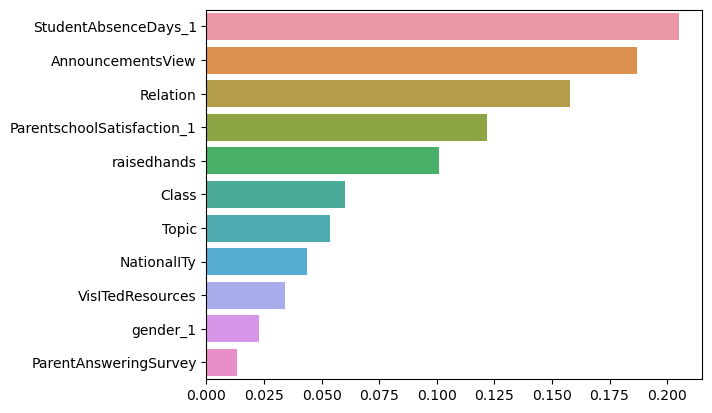

In [2497]:
fi = pd.Series(model.feature_importances_)
fi.index = col
fi = fi.sort_values(ascending=False)
fi = fi[fi.values > 0]

sns.barplot(x=fi, y=fi.index,ci=None);

In [2498]:
fi.index

Index(['StudentAbsenceDays_1', 'AnnouncementsView', 'Relation',
       'ParentschoolSatisfaction_1', 'raisedhands', 'Class', 'Topic',
       'NationalITy', 'VisITedResources', 'gender_1', 'ParentAnsweringSurvey'],
      dtype='object')

## Test 셋 Class 예측

In [2499]:
test['NationalITy'] = test['NationalITy'].map(lambda x : x.replace('KW','KuwaIT'))
test['immigration'] = test['NationalITy'] != test['PlaceofBirth']

test['immigration'][test['immigration'] == False] = 0
test['immigration'][test['immigration'] == True ] = 1

test['major'] = np.where(test['Topic'].isin(LA),0,1)
test['major'].value_counts()
enc = OrdinalEncoder(cols = ['NationalITy','StageID','Topic'])
test = enc.fit_transform(test)

test['gender'][test['gender'] == "F"] = 0
test['gender'][test['gender'] == "M"] = 1
test['gender'] = test['gender'].astype(int)

test["Class"][test["Class"] == "L"] = 0
test["Class"][test["Class"] == "M"] = 1
test["Class"][test["Class"] == "H"] = 2
test['Class'] = test['Class'].astype(int)

test['ParentschoolSatisfaction'][test['ParentschoolSatisfaction'] == "Good"] = 0
test['ParentschoolSatisfaction'][test['ParentschoolSatisfaction'] == "Bad"] = 1
test['ParentschoolSatisfaction'] = test['ParentschoolSatisfaction'].astype(int)

test['ParentAnsweringSurvey'][test['ParentAnsweringSurvey'] == "Yes"] = 1
test['ParentAnsweringSurvey'][test['ParentAnsweringSurvey'] == "No"] = 0
test['ParentAnsweringSurvey'] = test['ParentAnsweringSurvey'].astype(int)

test['Relation'][test['Relation'] == "Father"] = 1
test['Relation'][test['Relation'] == "Mum"] = 0
test['Relation'] = test['Relation'].astype(int)

test['StudentAbsenceDays'][test['StudentAbsenceDays'] == "Under-7"] = 0
test['StudentAbsenceDays'][test['StudentAbsenceDays'] == "Above-7"] = 1
test['StudentAbsenceDays'] = test['StudentAbsenceDays'].astype(int)

test = pd.get_dummies(test, columns=['gender','ParentschoolSatisfaction','StudentAbsenceDays',
                            'StudentAbsenceDays']
                   ,drop_first = True
                               )

C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanga\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [2500]:
test_fs = set(test.columns.tolist()) & set(fs)

In [2501]:
test_features = test[test_fs].values
label = test['Class'].values

# Makeing prediction for the test set, and print the prediction.
y_pred = model.predict(test_features)
print(y_pred)

[2 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 2 1 0 0 0 1 1 2 2 1 2 2 1 1 1 1 2 0 2 1
 0 1 1 1 2 1 1 0 1 1 2 1 1 1 1 1 1 2 0 1 2 1 1 1 0 2 1 1 0 0 1 1 1 1 2 1 0
 0 0 0 2 0 1 1 1 1 1 1 1 1 1 2 2 2 1 0 1 1 0 2 2 1 1 1 1 0 0 1 1 0 0 2 0 1
 2 2 2 1 0 2 2 0 0 2 2 1 2 0 2 2 1 2 2 2 2 1 1 2 2 2 1 1 1 0 2 2 2]


In [2502]:
my_solution = pd.DataFrame(y_pred , columns = ["Class"])
print(my_solution)

     Class
0        2
1        1
2        0
3        0
4        1
..     ...
139      1
140      0
141      2
142      2
143      2

[144 rows x 1 columns]


In [2503]:
my_solution.shape

(144, 1)

In [2504]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_pred, test["Class"])
print(results)

[[26  6  1]
 [12 45 13]
 [ 2 18 21]]


<AxesSubplot:>

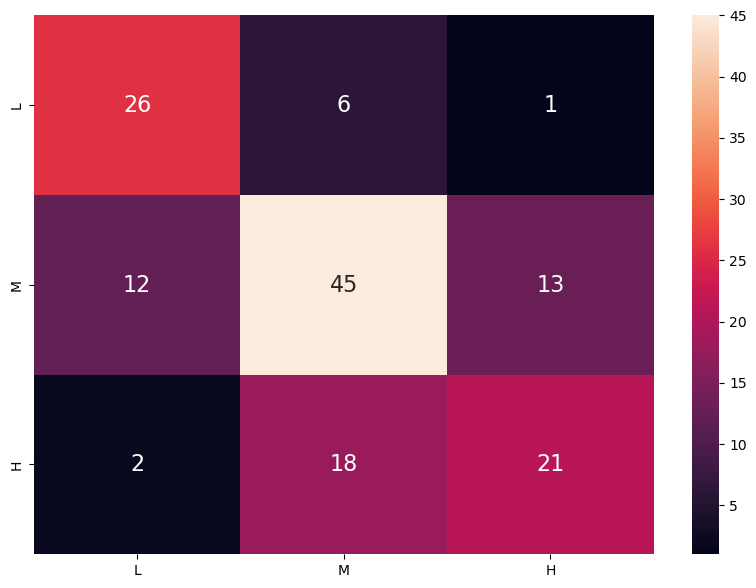

In [2505]:
from sklearn.metrics import classification_report
df_cm = pd.DataFrame(results, index = [i for i in "LMH"],
                  columns = [i for i in "LMH"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

In [2506]:
from sklearn.metrics import classification_report, accuracy_score
y_true = test["Class"]
target_names = ['class 0(L)', 'class 1(M)', 'class 2(H)']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  class 0(L)       0.79      0.65      0.71        40
  class 1(M)       0.64      0.65      0.65        69
  class 2(H)       0.51      0.60      0.55        35

    accuracy                           0.64       144
   macro avg       0.65      0.63      0.64       144
weighted avg       0.65      0.64      0.64       144



### Grid-Search CV 하이퍼파라미터 최적화

In [2507]:
list(col)

['AnnouncementsView',
 'raisedhands',
 'Topic',
 'Relation',
 'VisITedResources',
 'ParentschoolSatisfaction_1',
 'Discussion',
 'StudentAbsenceDays_1',
 'gender_1',
 'ParentAnsweringSurvey',
 'Class',
 'NationalITy']

In [2508]:
fi.index

Index(['StudentAbsenceDays_1', 'AnnouncementsView', 'Relation',
       'ParentschoolSatisfaction_1', 'raisedhands', 'Class', 'Topic',
       'NationalITy', 'VisITedResources', 'gender_1', 'ParentAnsweringSurvey'],
      dtype='object')

In [2509]:
df = pd.concat([train,test])

feature_names = fi.index.tolist()
feature_names.remove('Class')
label_name = "Class"

train =df[feature_names]
test = df[label_name]

In [2510]:
fi.index

Index(['StudentAbsenceDays_1', 'AnnouncementsView', 'Relation',
       'ParentschoolSatisfaction_1', 'raisedhands', 'Class', 'Topic',
       'NationalITy', 'VisITedResources', 'gender_1', 'ParentAnsweringSurvey'],
      dtype='object')

In [2511]:
X_train, X_test, y_train, y_test = train_test_split(train, test,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 11) (96, 11) (384,) (96,)


In [2512]:
X_train

,StudentAbsenceDays_1,StudentAbsenceDays_1,AnnouncementsView,Relation,ParentschoolSatisfaction_1,raisedhands,Topic,NationalITy,VisITedResources,gender_1,ParentAnsweringSurvey
76,0,0,37,0,0,15,9,11,70,1,1
72,0,0,2,1,1,11,7,4,2,1,0
111,0,0,51,1,0,77,9,4,80,1,0
252,0,0,82,1,1,69,4,4,76,0,0
55,1,1,6,1,0,16,7,4,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,39,1,1,70,3,4,81,1,0
357,0,0,21,1,0,25,6,2,87,1,1
159,0,0,48,1,0,62,4,1,68,0,1
41,0,0,16,1,0,19,9,4,20,1,0


In [2513]:
param = {
    'criterion': ['gini'], 
    'max_leaf_nodes':[None,2,3,4],  
    'min_samples_leaf':[1,2,3], 
    'max_features':[None,'sqrt','log2',3,4,5],
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': [5,6,7,8,9],
    'min_samples_split': range(2, 5)
          
    }

criterion : 분할 성능 측정 기능

min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수로, 과적합을 제어하는데 주로 사용함. 작게 설정할 수록 분할 노드가 많아져 과적합 가능성이 높아짐.

max_depth : 트리의 최대 깊이, 깊이가 깊어지면 과적합될 수 있음.

max_features : 최적의 분할을 위해 고려할 최대 feature 개수 (default = None : 데이터 세트의 모든 피처를 사용)

min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 (과적합 제어 용도), 작게 설정 필요

max_leaf_nodes : 리프노드의 최대 개수

In [2514]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param, n_jobs=-1, cv = 10, scoring='accuracy', verbose=2,  refit=True)
result = clf.fit(X_train, y_train)

Fitting 10 folds for each of 9720 candidates, totalling 97200 fits


estimator : 보통 알고리즘을 객체로 만들어 넣어준다.

param_grid : 튜닝을 위한 대상 파라미터, 사용될 파라미터를 딕셔너리 형태로 넣어준다.

scoring : 예측 성능을 측정할 평가 방법을 넣는다. 분류 알고리즘일 때는, 'accuracy', 'f1', 회귀 알고리즘일 때는 'neg_mean_squared_error', 'r2' 등을 넣을 수 있다.

cv : 교차 검증에서 몇개로 분할되는지 지정한다.(정수로 넣어주면 K겹 교차검증이 되고, KFold(k) 이런식으로 넣어주어도 무방 // default 값은 cv=3)

refit : True로 하면 최적의 하이퍼 파라미터를 찾아서 estimator를 재학습시킨다. (default 값이 True임)

In [2515]:
best_model = clf.best_estimator_

In [2516]:
print('train Score : {}'.format(best_model.score(X_train,y_train)))
print('test Score : {}'.format(best_model.score(X_test,y_test)))

print('GridSearchCV 최적 파라미터:', clf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(clf.best_score_))

train Score : 0.8828125
test Score : 0.7604166666666666
GridSearchCV 최적 파라미터: {'criterion': 'gini', 'max_depth': 8, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0006000000000000001, 'min_samples_leaf': 2, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7580


In [2517]:
best_model

DecisionTreeClassifier(max_depth=8, max_features=4,
                       min_impurity_decrease=0.0006000000000000001,
                       min_samples_leaf=2, random_state=42)

In [2518]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix


y_pred = best_model.predict(X_test)
result = classification_report(y_true=y_test, y_pred=y_pred)
print(accuracy_score(y_test,y_pred))

0.7604166666666666


In [2519]:
print(result)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.67      0.72      0.69        36
           2       0.86      0.75      0.80        24

    accuracy                           0.76        96
   macro avg       0.78      0.76      0.77        96
weighted avg       0.77      0.76      0.76        96



In [2520]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(2).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_max_features',
       'param_max_leaf_nodes', 'param_min_impurity_decrease',
       'param_min_samples_leaf', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')